In [11]:
# mpg.csv 데이터를 데이터 프레임 mpg로 읽어 들임
import pandas as pd
mpg = pd.read_csv('C:/Users/213/Data/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [15]:
mpg.groupby(['manufacturer','drv']).agg(mean_cty = ('cty','mean'))

mean_cty
manufacturer drv           
audi         4    16.818182
             f    18.857143
chevrolet    4    12.500000
             f    18.800000
             r    14.100000
dodge        4    12.000000
             f    15.818182
ford         4    13.307692
             r    14.750000
honda        f    24.444444
hyundai      f    18.642857
jeep         4    13.500000
land rover   4    11.500000
lincoln      r    11.333333
mercury      4    13.250000
nissan       4    13.750000
             f    20.000000
pontiac      f    17.000000
subaru       4    19.285714
toyota       4    14.933333
             f    21.368421
volkswagen   f    20.925926

In [17]:
mpg.query('manufacturer =="audi"')\
        .groupby(['drv'])\
        .agg( n = ('drv','count'))

,n
drv,
4,11
f,7


In [19]:
#1. suv 추출 : query()
mpg_suv = mpg.query('category == "suv"')
mpg_suv.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
18,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
21,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv
22,chevrolet,c1500 suburban 2wd,6.0,2008,8,auto(l4),r,12,17,r,suv


In [30]:
# 2.합산 연비 변수 만들기 : assign()
mpg_suv = mpg_suv.assign(total = (mpg['hwy']+mpg['cty']) / 2) 

In [29]:
#3. 합산 연비 평균 구하기 : agg()
mpg_suv = mpg_suv.groupby('manufacturer').agg(mean_tot = ('total','mean'))
mpg_suv.head(5)

,mean_tot
manufacturer,
chevrolet,NaN
dodge,NaN
ford,NaN
jeep,NaN
land rover,NaN


In [39]:
#4.내림차순 정렬하기 : sort_values()
mpg_suv = mpg_suv.sort_values('mean_tot',ascending = False)
mpg_suv.head(5)

,mean_tot,total
manufacturer,,
chevrolet,NaN,NaN
dodge,NaN,NaN
ford,NaN,NaN
jeep,NaN,NaN
land rover,NaN,NaN


In [45]:
#5.상의 cell의 (1) ~ (6)까지 의 작업을 하나의 구문으로 
mpg.query('category == "suv"').assign(total = (mpg['hwy'] + mpg['cty'])/ 2)\
            .groupby('manufacturer').agg(mean_tot=('total','mean'))\
            .sort_values('mean_tot',ascending=False).head(5)

,mean_tot
manufacturer,
subaru,21.916667
toyota,16.312500
nissan,15.875000
mercury,15.625000
jeep,15.562500


In [47]:
#데이터 합치기(merge(),concat())
#Lab 6 : 가로로 합치기
#중간고사 점수를 갖는 데이터 프레임 생성
test1 = pd.DataFrame({'id':[1,2,3,4,5,6],
                      'midterm':[60,80,70,90,85,66]})
test1


,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,66


In [50]:
# 데이터 프레임 test1과 test2를 가로로 합치기 (how = 'left')
test2 = pd.DataFrame( {'id' : [1, 2, 3, 4, 5, 7],
                        'finalterm' : [70, 83, 65, 95, 80, 77]
})
total = pd.merge(test1,test2, how= 'right', on = 'id')
total

,id,midterm,finalterm
0,1,60.0,70
1,2,80.0,83
2,3,70.0,65
3,4,90.0,95
4,5,85.0,80
5,7,NaN,77


In [52]:
#Lab 7 : 세로로 합치기 (concat())
# 첫번째 시험 결과 데이터 프레임으로 생성
group_a = pd.DataFrame({'id' : [1, 2, 3, 4, 5],
'test' : [60, 80, 70, 90, 85]
})

# 두번째 시험 결과 데이터 프레임으로 생성
group_b = pd.DataFrame({'id' : [6, 7, 8, 9, 10],
'test' : [70, 83, 65, 95, 80]
})

In [57]:
# 첫번째와 두번째 시험 결과 데이터 프레임을 세로로 합치기
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [58]:
group_all= pd.concat([group_a, group_b],ignore_index=True)
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


In [59]:
       함수                                    기능
query()                                       행 추출
df[]                             열 추출
sort_values('math')                           정렬
groupby('category').agg(새로운변수)        집단별로 나누기
exam.assign(newcolumns = exam['math']+1)   변수추출하기 => 새로운 컬럼 추가
agg()                                      집단별 통계치 구하기
mearge()                                   데이터 합치기(열)
concat()                                   데이터 합치기(행)

SyntaxError: invalid syntax (1667464363.py, line 1)

In [61]:
#7-1 결측치(빠진 데이터 찾아 정제)
#Lab 1 : 결측치 찾기

import numpy as np
import pandas as pd


In [62]:
# 결측치가 들어있는 데이터 프레임 만들기
# NaN : Not a Number 숫자 형태의 누락된 데이터
df = pd.DataFrame( {'gender' : ['M', 'F', np.nan, 'M', 'F'],
                     'score' : [5, 4, 3, 4, np.nan]} )
df

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [63]:
# NaN 값으로 연산된 결과 값도 NaN
df['score']+1

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [65]:
# 결측치 확인하기
# na : Not Avaiable
pd.isna(df)

,gender,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [66]:
pd.isna(df).sum()

gender    1
score     1
dtype: int64

In [67]:
# 컬럼(변수) score의 결측치 개수
pd.isna(df)['score'].sum()


1

In [68]:
#Lab 2 : 결측치 제거
df

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [70]:
df.query

<bound method DataFrame.query of   gender  score
0      M    5.0
1      F    4.0
2    NaN    3.0
3      M    4.0
4      F    NaN>

In [73]:
# score 변수에서 결측치가 있는 행을 제거
df.dropna(subset = ['score'])

,gender,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [76]:
df_nomiss = df.dropna(subset = ['gender','score'])
df_nomiss

,gender,score
0,M,5.0
1,F,4.0
3,M,4.0


In [88]:
#Lab 3 : 결측치를 평균 값으로 대체하기
exam = pd.read_csv('C:/Users/213/Data/exam.csv')
# 인덱스 값 2, 7, 14에 해당 하는 행의 math 컬럼 값을 NaN 값으로 변경
exam.loc[[2,7,14],['math']] = np.nan
exam.head()

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65


In [90]:
exam['math'].mean()

55.2

In [89]:
# 결측치 값을 평균값 대체하기
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [92]:
exam['math'].isna().sum()

0

In [93]:
# 인데스 값 [64, 123, 130, 152, 211]의 고속도록 연비(hwy) 값을 결측치로 만들기
mpg.loc[[64, 123, 130, 152, 211], 'hwy'] = np.nan

In [94]:
# 인데스 값 [64, 65]의 데이터를 출력해서 NaN 값 확인
mpg.loc[64:66]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
64,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,NaN,r,pickup
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12.0,e,pickup
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17.0,r,pickup


In [95]:
mpg[['drv','hwy']].isna().sum()

drv    0
hwy    5
dtype: int64

In [96]:
# 변수 hwy 값에 결측치가 몇개인지 확인
mpg.dropna(subset = ['hwy']).isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

In [100]:
# 어떤 구동 방식의 hwy 평균 연비가 높은지 알아보시오.하나의 pandas 구문으로 작성해 보시오
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [101]:
#7-2 이상한 데이터를 찾아라! - 이상치 정제하기
#Lab 5 : 이상치 정제하기 (이상한 데이터 찾아 정제)
# 이상치를 갖는 데이터 만들기
# gender (남자 - 1, 여자 - 2)
# score (1점 ~ 5점) 5점 척도로 분류
# 이상치 : gender - 3, score - 6
df = pd.DataFrame( {'gender' : [1, 2, 1, 3, 2, 1],
                     'score' :[5, 4, 3, 4, 2, 6],})
df    

,gender,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [102]:
# 이상치 확인하기
# gender 값의 집단별 빈도수 확인 - 3값이 존재
df['gender'].value_counts().sort_index()

1    3
2    2
3    1
Name: gender, dtype: int64

In [103]:
# 이상 값을 찾아 결측치 부여
df['gender'] = np.where(df['gender'] == 3, np.nan, df['gender'])
df

,gender,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [104]:
# 이상 값을 찾아 결측치 부여
df['score'] = np.where(df['score'] >5 , np.nan, df['score'])
df

,gender,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [107]:
#결측치를 제외하고 데이터분석
df.dropna(subset =['gender','score']).groupby('gender').agg(mean_score=('score','mean'))
df

,gender,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


<AxesSubplot:ylabel='hwy'>

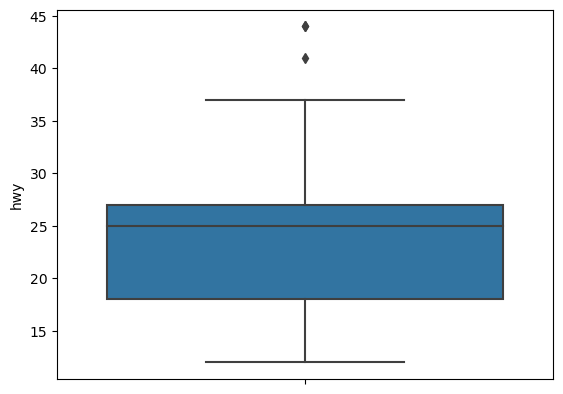

In [109]:
#Lab 6 : 이상치 제거하기 - 극단적인 값
import seaborn as sns
sns.boxplot(data = mpg, y='hwy')

In [111]:
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [112]:

pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [113]:
iqr = pct75 -pct25
iq

9.0

In [114]:
pct25 - 1.5 * iqr

4.5

In [116]:
pct75 + 1.5 *iqr

40.5

In [119]:
# 극단치를 결측 처리함
# 주의 : np.where()의 각 조건을 괄호로 감싸주어야 함
mpg['hwy'] = np.where((mpg['hwy'] <4.5 ) | (mpg['hwy'] >40.5), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum()

8

In [120]:
mpg.dropna(subset = ['hwy']).groupby('drv').agg(mean_hwy= ('hwy','mean'))

,mean_hwy
drv,
4,19.242424
f,27.764706
r,21.000000
